#### Objective

With this workflow I import an image with a map, isolate the map using morphological operations. The resulting image is the input to a colormap recognition and data extration workflow.

#### Preliminaries - import main libraries

In [1]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import color, io, exposure
from skimage.morphology import disk, diamond, square, opening, dilation, convex_hull_image
from skimage.morphology import remove_small_objects

%matplotlib inline

#### Import test image

In [2]:
# import from url
#url = 'https://mycarta.files.wordpress.com/2016/09/cgg_combo.jpg'
#img = np.asarray(io.imread(url))[:,:,:3] # removing alpha channel

img = np.asarray(io.imread('test_f3_distorted.jpg'))[:,:,:3]

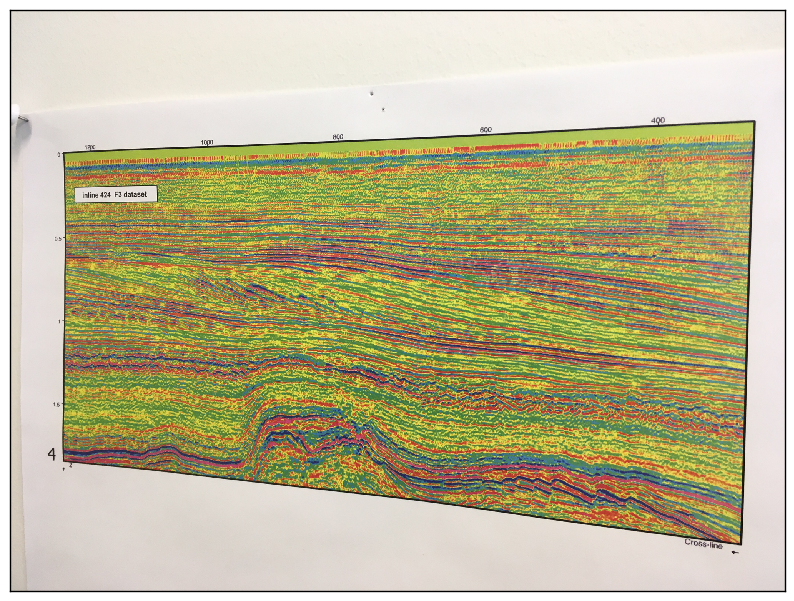

In [3]:
# plot it
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.imshow(img,  interpolation = 'none')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
plt.show()
#fig.savefig('input.png', dpi=400, bbox_inches='tight', pad_inches=0) 


#### Gray scale conversion and contrast stretching

In [4]:
gry = color.rgb2gray(img);
p2, p95 = np.percentile(gry, (2, 95))
rescale = exposure.rescale_intensity(gry, in_range=(p2, p95))

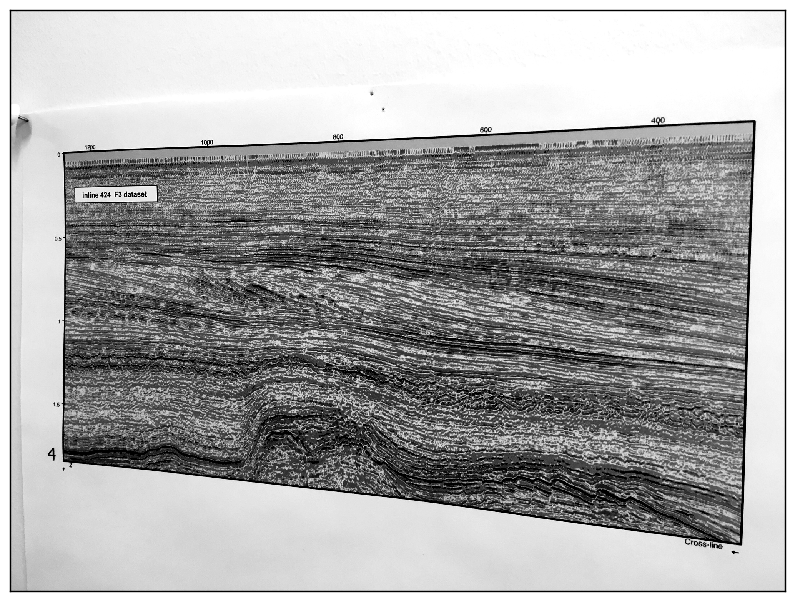

In [5]:
# plot it
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.imshow(rescale,  interpolation = 'none', cmap = 'gray')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
plt.show()
#fig.savefig('input.png', dpi=400, bbox_inches='tight', pad_inches=0) 

#### Preprocessing and canny edge detection, then dilation

In [6]:
# open to remove small features like tick marks and labels
# dilate
enhanced = dilation(opening(1-rescale, disk(7)), square(7))

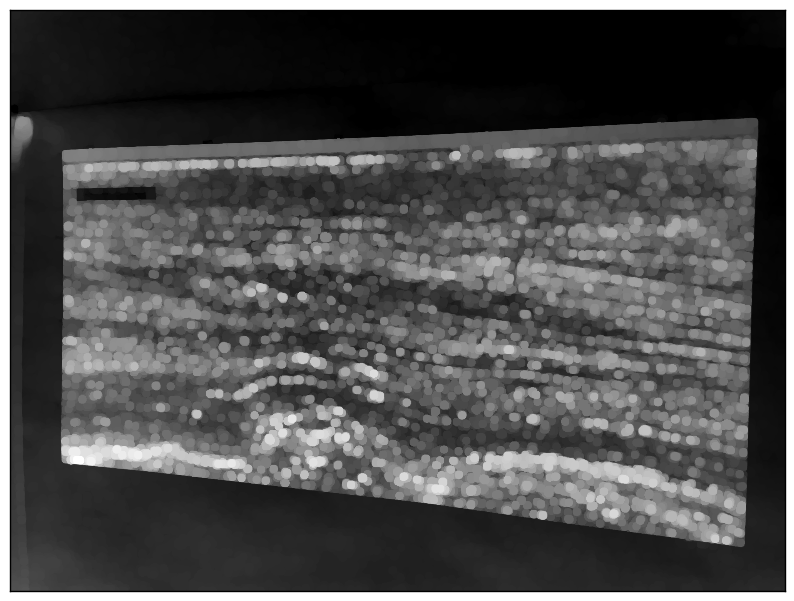

In [7]:
# plot it
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.imshow(enhanced, cmap = 'gray')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
plt.show()
#fig.savefig('input.png', dpi=400, bbox_inches='tight', pad_inches=0) 

In [8]:
# median filter
from scipy import signal
mdn = signal.medfilt2d(enhanced, 3)

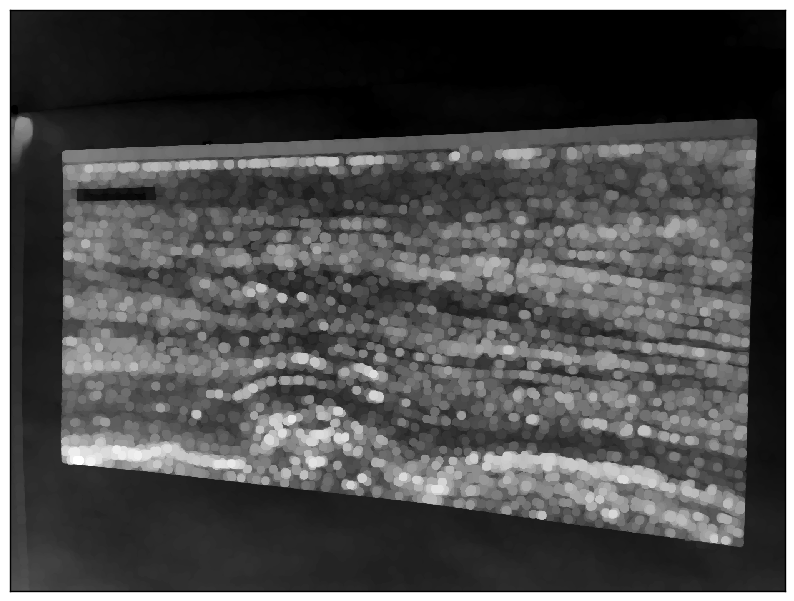

In [9]:
# plot it
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.imshow(mdn, interpolation = 'none', cmap = 'gray')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
plt.show()
#fig.savefig('input.png', dpi=400, bbox_inches='tight', pad_inches=0) 

#### Canny edge detection and dilation

In [10]:
# Canny edge
from skimage import feature
cn = feature.canny(mdn)

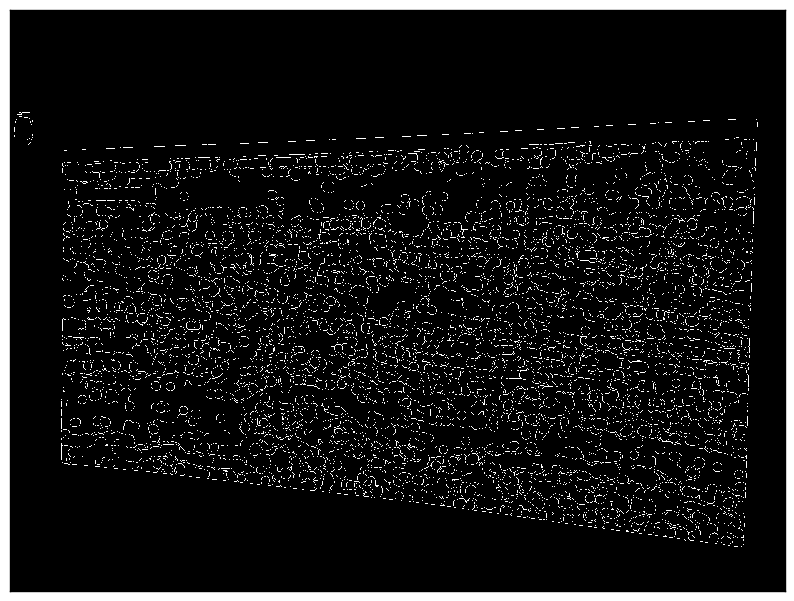

In [11]:
# plot it
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.imshow(cn, interpolation = 'none', cmap = 'gray')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
plt.show()
#fig.savefig('input.png', dpi=400, bbox_inches='tight', pad_inches=0) 

In [12]:
cnny = dilation(cn, square(5))

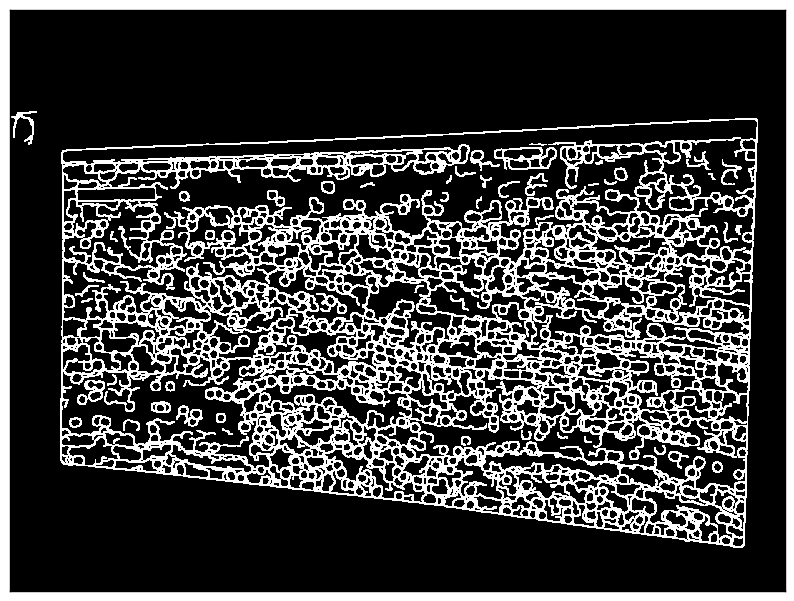

In [13]:
# plot it
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.imshow(cnny, interpolation = 'none', cmap = 'gray')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
plt.show()
#fig.savefig('input.png', dpi=400, bbox_inches='tight', pad_inches=0) 